In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, SimpleRNN

In [4]:
max_feat=10000
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_feat)

In [ ]:
word_index = imdb.get_word_index()
index = word_index.get("good")  # returns the integer index for "good"

49

In [16]:
# Build reverse index
reverse_index = {value+3: key for key, value in word_index.items()}#first three are reserved for special keys


In [9]:
X_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [22]:
for wor in X_train[0]:
    print(reverse_index.get(wor))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [23]:
max_len=500
X_train=sequence.pad_sequences(X_train,maxlen=max_len)
X_test=sequence.pad_sequences(X_test,maxlen=max_len)

In [33]:
model=Sequential()
model.add(Embedding(max_feat,128,input_length=max_len))
model.add(SimpleRNN(64,activation='relu', return_sequences=True))
model.add(SimpleRNN(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])


In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 500, 64)           12352     
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1300673 (4.96 MB)
Trainable params: 1300673 (4.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [34]:
history=model.fit(
    X_train,y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=[earlyStop]
)

Epoch 1/10

625/625 [==============================] - 122s 192ms/step - loss: 9.9832 - accuracy: 0.6496 - val_loss: 0.5816 - val_accuracy: 0.6744
Epoch 2/10
625/625 [==============================] - 101s 161ms/step - loss: 0.5157 - accuracy: 0.7410 - val_loss: 0.5210 - val_accuracy: 0.7250
Epoch 3/10
625/625 [==============================] - 101s 162ms/step - loss: 0.3896 - accuracy: 0.8238 - val_loss: 0.4779 - val_accuracy: 0.7636
Epoch 4/10
625/625 [==============================] - 101s 161ms/step - loss: 0.2804 - accuracy: 0.8799 - val_loss: 0.4128 - val_accuracy: 0.8226
Epoch 5/10
625/625 [==============================] - 97s 155ms/step - loss: 0.2299 - accuracy: 0.9067 - val_loss: 0.5034 - val_accuracy: 0.7864
Epoch 6/10
625/625 [==============================] - 97s 155ms/step - loss: 0.1786 - accuracy: 0.9297 - val_loss: 0.5301 - val_accuracy: 0.7980
Epoch 7/10
625/625 [==============================] - 98s 157ms/step - loss: 0.1290 - accuracy: 0.9509 - val_loss: 0.5953 - v

In [35]:
model.save('simple_rnn_imdb.h5')

c:\Users\panra\codeFiles\NLP\venv2\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


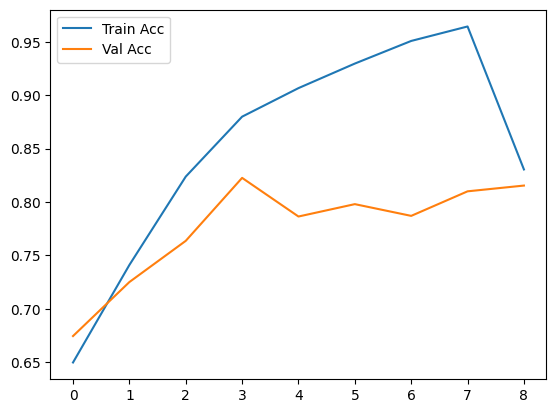

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()


In [37]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


782/782 [==============================] - 38s 49ms/step - loss: 0.4315 - accuracy: 0.8138
Test Accuracy: 0.8138399720191956


In [38]:
print("Best epoch:", np.argmax(history.history['val_accuracy']))


Best epoch: 3
